**Last updated: Monday, August 29, 2022**

## Set configurations

Using pandas is the only package necessary to bulid the feature store. The max columns is set to 500 because by the end there will be over 35 features

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

## Read alumni data

This is a file containing all of the alumni from the various outlets. It was compiled from three different sheets with the alumni from each outlet. This file can be provided, but at this present time, I don't know what changes will be made that may render that moot.

In [2]:
msm_alumni = pd.read_excel("/Users/gcdyw9/Downloads/full_alum_data.xlsx",sheet_name="Sheet1")
msm_alumni.head()

,FULL_NAME,EMAIL_1,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,FIRST_NAME,LAST_NAME
0,GRACE SANDS,gcsn8c@mail.missouri.edu,True,True,False,GRACE,SANDS
1,TARA MORTS,tlmkkm@mail.missouri.edu,True,False,False,TARA,MORTS
2,VICTORIA CHEYNE,torircheyne@hotmail.com,True,False,False,VICTORIA,CHEYNE
3,CHARLES SPERRY,yosquirt@mac.com,True,False,False,CHARLES,SPERRY
4,WILLIAM TAMMEUS,wtammeus@gmail.com,True,False,False,WILLIAM,TAMMEUS


## Read form responses

This is a file that is pulled from a Google Form response sheet that was sent out to an unknown number of MSM alumni. I am intending to pull this every month or so to update. In order to join on the alumnis' full name, I coerced the name column to all caps

In [4]:
alumni_form = pd.read_csv("/Users/gcdyw9/Downloads/Mizzou Student Media Alumni Involvement Form.csv")
alumni_form['Full name'] = alumni_form['Full name'].str.upper()
alumni_form.head()

,Timestamp,Full name,Non-work email,Please select your highest level of education,Undergraduate graduation year,Current zip code,Outlet(s) you worked at,Position(s) you held within the outlet(s) chosen above,Years active at your Mizzou Student Media outlet,Current role and organization,Indicate the opportunities described above that you're interested in pursuing.
0,7/12/22 6:31,SETH WICKERSHAM,sethwickersham@hotmail.com,Bachelor's Degree,2000,6107,The Maneater,Staff Writer,1997,"Senior Writer, ESPN; book author",Receiving the bi-weekly alumni newsletter
1,7/13/22 13:57,CARIN HUFFMAN GRINCH,carinhuffmangrinch@gmail.com,Bachelor's Degree,2000,65203,The Maneater,"Ad Sales Rep, Classifieds Manager, Business Ma...",1997 - 2000,"Director of Donor Relations, University of Mis...","Receiving the bi-weekly alumni newsletter, Aud..."
2,7/13/22 13:59,ERIC ADAMS,eadams@lebanon.k12.mo.us,Master's Degree,1996,65536,The Maneater,"photographer, reporter & photo editor",1991-95,"video-photo, digital media teacher at Lebanon ...","Becoming a mentor for the mentorship program, ..."
3,7/13/22 14:00,MARY PRICHARD,Maryprich@gmail.com,Master's Degree,2004,64155,The Maneater,"Website management, reporter",2,Journalism Educator & HS media adviser in Miss...,"Receiving the bi-weekly alumni newsletter, Aud..."
4,7/13/22 14:01,KATHERINE KNOTT,Kknott123@gmail.com,Bachelor's Degree,2016,22902,The Maneater,Managing editor,2012-16,"Education Reporter, The Daily Progress","Becoming a mentor for the mentorship program, ..."


## Join Alumni and Response data

Below I joined the alumni and response data, with the alumni data being the primary in the join given it was significantly larger than the response data. Given it had the most consistency between parallel columns in each dataset, I merged on the full name, which then became the index

In [6]:
alumni_join = msm_alumni.set_index('FULL_NAME').join(alumni_form.set_index('Full name')).reset_index()

In [7]:
alumni_join.head()

,index,EMAIL_1,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,FIRST_NAME,LAST_NAME,Timestamp,Non-work email,Please select your highest level of education,Undergraduate graduation year,Current zip code,Outlet(s) you worked at,Position(s) you held within the outlet(s) chosen above,Years active at your Mizzou Student Media outlet,Current role and organization,Indicate the opportunities described above that you're interested in pursuing.
0,AAMER MADHANI,aamermadhani@gmail.com,True,False,False,AAMER,MADHANI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AARON CARTER,Aaroncarter51298@gmail.com,False,True,True,AARON,CARTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AARON CUMMINS,aaroncummins@yahoo.com,False,True,False,AARON,CUMMINS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AARON LADD,laddaaron0@gmail.com,False,False,True,AARON,LADD,7/13/22 14:37,laddaaron0@gmail.com,Bachelor's Degree,2018,64111,MUTV,MUTV Sports Reporter,2015-2016,KSHB 41 TV,"Becoming a mentor for the mentorship program, ..."
4,AARON MORALES,morgan.amgardens@gmail.com,True,False,False,AARON,MORALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_____

#### Create form response flag

The first feature I created was whether or not the alumni had filled out the form by checking each account to see if they had a timestamp (indicative of a response)

In [9]:
alumni_join['Timestamp'] = alumni_join['Timestamp'].fillna("X")

In [10]:
form_responses = []
for x in alumni_join['Timestamp']:
    if x == "X":
        form_responses.append(False)
    else:
        form_responses.append(True)

In [11]:
alumni_join['form_response'] = form_responses

__________

## Zip code data

### Read in zip code data

I got this data from the IRS about average income by zip code across the US. One of the fields on the alumni survey was their current zipcode, which will be used to gather more information

In [12]:
data_zip = pd.read_csv('/Users/gcdyw9/Downloads/19zpallagi.csv')

In [14]:
data_zip_dummy = data_zip.set_index('zipcode')

### Aggregate zipcode sheet

I aggregated the IRS sheet by zipcode because ther raw data was subdivided by a few categories

In [15]:
zipcode_data = data_zip.groupby('zipcode').agg(
    state=pd.NamedAgg('STATE',max),
    returns = pd.NamedAgg('returns',sum),
    individuals = pd.NamedAgg('individuals',sum),
    incomes = pd.NamedAgg('income_returns',sum),
    total_income = pd.NamedAgg('income',sum),
    salaries = pd.NamedAgg('salaries_return',sum),
    total_salaries = pd.NamedAgg('salaries',sum)
)
zipcode_data = zipcode_data.drop(zipcode_data[zipcode_data.index == 0].index)
zipcode_data = zipcode_data.drop(zipcode_data[zipcode_data.index == 99999].index)
zipcode_data = zipcode_data.reset_index()

### Create different average income calculations (avg_income3 is the most accurate)

In [16]:
zipcode_data['avg_income1'] = zipcode_data['total_income']/zipcode_data['individuals']
zipcode_data['avg_income2'] = zipcode_data['total_income']/zipcode_data['returns']
zipcode_data['avg_income3'] = zipcode_data['total_income']/zipcode_data['incomes']

In [17]:
zipcode_data[['zipcode','state','avg_income2']].max()

zipcode              99901
state                   WY
avg_income2    3296.829631
dtype: object

zipcode_data.loc[zipcode_data['avg_income3']==zipcode_data['avg_income3'].max(),('zipcode','state','avg_income3')]

### Data exploration

In [18]:
zipcode_data['avg_income3'].describe()

count    27593.000000
mean        69.830687
std         55.670185
min         12.700000
25%         48.234742
50%         57.569445
75%         72.875001
max       3296.829631
Name: avg_income3, dtype: float64

<AxesSubplot:>

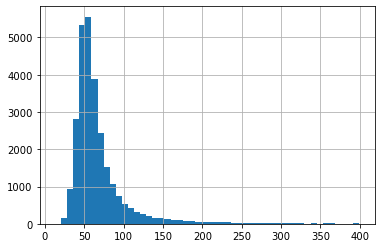

In [19]:
zipcode_data.loc[zipcode_data['avg_income3']<400,'avg_income3'].hist(bins=50)

### Change dtypes for zipcodes for mapping

In [20]:
zipcode_data['zipcode'] = zipcode_data['zipcode'].astype(str)

In [21]:
alumni_join['Current zip code']= alumni_join['Current zip code'].astype(str)

### Join the zipcode data to the alumni_join df

In [22]:
alumni_join['state'] = alumni_join['Current zip code'].map(zipcode_data.set_index('zipcode')['state'])

In [23]:
alumni_join['zip_avg_income'] = alumni_join['Current zip code'].map(zipcode_data.set_index('zipcode')['avg_income3'])

_____

### Fix Northeast zip codes

In [26]:
zipcode_data.loc[zipcode_data['state']=='CT']['zipcode'] = "0"+zipcode_data.loc[zipcode_data['state']=='CT']['zipcode']

<ipython-input-26-b470dbdcb78d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_data.loc[zipcode_data['state']=='CT']['zipcode'] = "0"+zipcode_data.loc[zipcode_data['state']=='CT']['zipcode']


In [27]:
zipcode_data.loc[zipcode_data['state']=='NJ','zipcode'] = "0"+zipcode_data.loc[zipcode_data['state']=='NJ','zipcode']


In [28]:
zipcode_data.loc[zipcode_data['state']=='CT','zipcode'] = "0"+zipcode_data.loc[zipcode_data['state']=='CT','zipcode']


In [29]:
zipcode_data.loc[zipcode_data['state']=='VT','zipcode'] = "0"+zipcode_data.loc[zipcode_data['state']=='VT','zipcode']


In [30]:
zipcode_data.loc[zipcode_data['state']=='MA','zipcode'] = "0"+zipcode_data.loc[zipcode_data['state']=='MA','zipcode']


______

______

______

## Calculate the number of outlets per account

In [35]:
alumni_join['number_outlets'] = alumni_join[['MANEATER_ALUM_FLAG','KCOU_ALUM_FLAG','MUTV_ALUM_FLAG']].sum(axis=1)

______

# Email lists

## Opportunities

### Newsletter

In [39]:
newsletter_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna("").str.contains("Receiving the bi-weekly alumni newsletter", case=False),('index','EMAIL_1')]

In [40]:
newsletter_list.shape

(71, 2)

In [41]:
newsletter_list_flag = [True if any(y in x for y in newsletter_list['index']) else False for x in alumni_join['index'].fillna("X")]

##### Flag creation

In [43]:
alumni_join['newsletter_list_flag'] = newsletter_list_flag

In [44]:
alumni_join['newsletter_list_flag'].value_counts()

False    1811
True       71
Name: newsletter_list_flag, dtype: int64

newsletter_list.to_excel('/Users/gcdyw9/Documents/email_lists/NEWSLETTER_LIST_08_29_2022.xlsx')

### Mentorship

In [45]:
mentorship_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna("").str.contains("Becoming a mentor for the mentorship program", case=False),('index','EMAIL_1')]

In [46]:
mentorship_list.shape

(38, 2)

##### Flag creation

In [47]:
mentorship_list_flag = [True if any(y in x for y in mentorship_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [48]:
alumni_join['mentorship_list_flag'] = mentorship_list_flag

In [49]:
alumni_join['mentorship_list_flag'].value_counts()

False    1844
True       38
Name: mentorship_list_flag, dtype: int64

mentorship_list.to_excel('/Users/gcdyw9/Documents/email_lists/MENTORSHIP_LIST_08_29_2022.xlsx')

### Auditing

In [50]:
auditing_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna("").str.contains("Auditing content from the MSM outlets, asynchronously, 4 times per year", case=False),('index','EMAIL_1')]

In [51]:
auditing_list.shape

(37, 2)

##### Flag creation

In [52]:
auditing_list_flag = [True if any(y in x for y in auditing_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [53]:
alumni_join['auditing_list_flag'] = auditing_list_flag

In [54]:
alumni_join['auditing_list_flag'].value_counts()

False    1844
True       38
Name: auditing_list_flag, dtype: int64

auditing_list.to_excel('/Users/gcdyw9/Documents/email_lists/AUDITING_LIST_08_26_2022.xlsx')

### Apparel

In [55]:
apparel_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna("").str.contains("Buying apparel", case=False),('index','EMAIL_1')]

In [56]:
apparel_list.shape

(44, 2)

##### Flag creation

In [57]:
apparel_list_flag = [True if any(y in x for y in apparel_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [58]:
alumni_join['apparel_list_flag'] = apparel_list_flag

In [59]:
alumni_join['apparel_list_flag'].value_counts()

False    1838
True       44
Name: apparel_list_flag, dtype: int64

apparel_list.to_excel('/Users/gcdyw9/Documents/email_lists/APPAREL_LIST_08_26_2022.xlsx')

### Workshops

In [60]:
workshop_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna('').str.contains("Running workshops for current staff", case=False),('index','EMAIL_1')]

In [61]:
workshop_list.shape

(26, 2)

##### Flag creation

In [62]:
workshop_list_flag = [True if any(y in x for y in workshop_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [63]:
alumni_join['workshop_list_flag'] = workshop_list_flag

In [64]:
alumni_join['workshop_list_flag'].value_counts()

False    1856
True       26
Name: workshop_list_flag, dtype: int64

workshop_list.to_excel('/Users/gcdyw9/Documents/email_lists/WORKSHOP_LIST_08_29_2022.xlsx')

### Networking

In [65]:
networking_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna('').str.contains("Attending networking events for staff", case=False),('index','EMAIL_1')]

In [66]:
networking_list.shape

(26, 2)

##### Flag creation

In [67]:
networking_list_flag = [True if any(y in x for y in networking_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [68]:
alumni_join['networking_list_flag'] = networking_list_flag

In [69]:
alumni_join['networking_list_flag'].value_counts()

False    1856
True       26
Name: networking_list_flag, dtype: int64

networking_list.to_excel('/Users/gcdyw9/Documents/email_lists/NETWORKING_LIST_08_29_2022.xlsx')

### Homecoming

In [70]:
homecoming_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna('').str.contains("Participating in an in-person homecoming event", case=False),('index','EMAIL_1','state')]

In [71]:
homecoming_list.shape

(24, 3)

##### Flag creation

In [72]:
homecoming_list_flag = [True if any(y in x for y in homecoming_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [73]:
alumni_join['homecoming_list_flag'] = homecoming_list_flag

In [74]:
alumni_join['homecoming_list_flag'].value_counts()

False    1858
True       24
Name: homecoming_list_flag, dtype: int64

homecoming_list.to_excel('/Users/gcdyw9/Documents/email_lists/HOMECOMING_LIST_08_29_2022.xlsx')

### Facebook

In [75]:
facebook_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna('').str.contains("Being in a Mizzou Student Media alumni facebook group", case=False),('index','EMAIL_1')]

In [76]:
facebook_list.shape

(48, 2)

##### Flag creation

In [77]:
facebook_list_flag = [True if any(y in x for y in facebook_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [78]:
alumni_join['facebook_list_flag'] = facebook_list_flag

In [79]:
alumni_join['facebook_list_flag'].value_counts()

False    1834
True       48
Name: facebook_list_flag, dtype: int64

facebook_list.to_excel('/Users/gcdyw9/Documents/email_lists/FACEBOOK_LIST_08_29_2022.xlsx')

### Scholarship

In [80]:
scholarship_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna('').str.contains("Help select scholarship recipients", case=False),('index','EMAIL_1')]

In [81]:
scholarship_list.shape

(32, 2)

##### Flag creation

In [82]:
scholarship_list_flag = [True if any(y in x for y in scholarship_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [83]:
alumni_join['scholarship_list_flag'] = scholarship_list_flag

In [84]:
alumni_join['scholarship_list_flag'].value_counts()

False    1850
True       32
Name: scholarship_list_flag, dtype: int64

scholarship_list.to_excel('/Users/gcdyw9/Documents/email_lists/SCHOLARSHIP_LIST_08_26_2022.xlsx')

### Advisory Board

In [85]:
advisory_list = alumni_join.loc[alumni_join["Indicate the opportunities described above that you're interested in pursuing."].fillna('').str.contains("Serve on the MSM advisory board", case=False),('index','EMAIL_1')]

In [86]:
advisory_list.shape

(22, 2)

##### Flag creation

In [87]:
advisory_list_flag = [True if any(y in x for y in advisory_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [88]:
alumni_join['advisory_list_flag'] = advisory_list_flag

In [89]:
alumni_join['advisory_list_flag'].value_counts()

False    1860
True       22
Name: advisory_list_flag, dtype: int64

advisory_list.to_excel('/Users/gcdyw9/Documents/email_lists/ADVISORY_LIST_08_26_2022.xlsx')

### Leadership Position

In [90]:
leadership_list = alumni_join.loc[alumni_join["Position(s) you held within the outlet(s) chosen above"].fillna('').str.contains(("editor|director|manager"), case=False),('index','EMAIL_1')]

In [91]:
leadership_list.shape

(44, 2)

##### Flag creation

In [92]:
leadership_list_flag = [True if any(y in x for y in leadership_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [93]:
alumni_join['leadership_list_flag'] = leadership_list_flag

In [94]:
alumni_join['leadership_list_flag'].value_counts()

False    1838
True       44
Name: leadership_list_flag, dtype: int64

leadership_list.to_excel('/Users/gcdyw9/Documents/email_lists/LEADERSHIP_LIST_08_29_2022.xlsx')

### Missouri

In [95]:
missouri_list = alumni_join.loc[alumni_join["state"].fillna('').str.contains(("MO"), case=False),('index','EMAIL_1')]

In [96]:
missouri_list.shape

(19, 2)

##### Flag creation

In [97]:
missouri_list_flag = [True if any(y in x for y in missouri_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [98]:
alumni_join['missouri_list_flag'] = missouri_list_flag

In [99]:
alumni_join['missouri_list_flag'].value_counts()

False    1863
True       19
Name: missouri_list_flag, dtype: int64

missouri_list.to_excel('/Users/gcdyw9/Documents/email_lists/MISSOURI_LIST_08_29_2022.xlsx')

### Multiple Outlets

In [100]:
multiple_outlets_list = alumni_join.loc[alumni_join["number_outlets"]>1,('index','EMAIL_1')]

In [101]:
multiple_outlets_list.shape

(96, 2)

##### Flag creation

In [102]:
multiple_outlets_list_flag = [True if any(y in x for y in multiple_outlets_list['index'].astype(str)) else False for x in alumni_join['index'].fillna('x')]

In [103]:
alumni_join['multiple_outlets_list_flag'] = multiple_outlets_list_flag

In [104]:
alumni_join['multiple_outlets_list_flag'].value_counts()

False    1787
True       95
Name: multiple_outlets_list_flag, dtype: int64

multiple_outlets_list.to_excel('/Users/gcdyw9/Documents/email_lists/MULTIPLE_OUTLETS_LIST_08_26_2022.xlsx')

### Education

alumni_form["Please select your highest level of education"].value_counts()

alumni_form.loc[alumni_form["Please select your highest level of education"]=="Bachelor's Degree",'zip_avg_income'].mean()

alumni_form.loc[alumni_form["Please select your highest level of education"]=="Master's Degree",'zip_avg_income'].mean()

alumni_form.loc[alumni_form["Please select your highest level of education"]=="Law Degree",'zip_avg_income'].mean()

alumni_form.loc[alumni_form["Please select your highest level of education"]=="PhD",'zip_avg_income'].mean()

alumni_form.loc[alumni_form["Please select your highest level of education"]=="Master's Degree, working on M.D.",'zip_avg_income'].mean()

missouri_list = alumni_form.loc[alumni_form["state"].str.contains(("MO"), case=False),('Full name','Non-work email')]

missouri_list.shape

missouri_list.to_excel('/Users/gcdyw9/Documents/email_lists/MISSOURI_LIST_08_26_2022.xlsx')

### Current Leadership Position

In [105]:
current_role_list = alumni_join.loc[alumni_join["Current role and organization"].fillna("").str.contains(("editor|director|manager|senior"), case=False),('index','EMAIL_1')]

In [106]:
current_role_list.shape

(29, 2)

##### Flag creation

In [107]:
current_role_list_flag = [True if any(y in x for y in current_role_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [108]:
alumni_join['current_role_list_flag'] = current_role_list_flag

In [109]:
alumni_join['current_role_list_flag'].value_counts()

False    1853
True       29
Name: current_role_list_flag, dtype: int64

current_role_list.to_excel('/Users/gcdyw9/Documents/email_lists/CURRENT_ROLE_LIST_08_29_2022.xlsx')

### Affluent Location

In [110]:
affluent_list = alumni_join.loc[alumni_join["zip_avg_income"]>=100,('index','EMAIL_1')]

In [111]:
affluent_list.shape

(29, 2)

##### Flag creation

In [112]:
affluent_list_flag = [True if any(y in x for y in affluent_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [113]:
alumni_join['affluent_list_flag'] = affluent_list_flag

In [114]:
alumni_join['affluent_list_flag'].value_counts()

False    1853
True       29
Name: affluent_list_flag, dtype: int64

affluent_list.to_excel('/Users/gcdyw9/Documents/email_lists/AFFLUENT_LIST_08_29_2022.xlsx')

### No form response

In [115]:
no_form = alumni_join.loc[alumni_join["form_response"]==False,('index','EMAIL_1')]

In [116]:
no_form.shape

(1803, 2)

no_form.to_excel('/Users/gcdyw9/Documents/email_lists/NO_FORM_08_29_2022.xlsx')

______

# Feature creation

#### Number of engagement points

In [117]:
alumni_join.columns.values

array(['index', 'EMAIL_1', 'MANEATER_ALUM_FLAG', 'KCOU_ALUM_FLAG',
       'MUTV_ALUM_FLAG', 'FIRST_NAME', 'LAST_NAME', 'Timestamp',
       'Non-work email', 'Please select your highest level of education',
       'Undergraduate graduation year', 'Current zip code',
       'Outlet(s) you worked at',
       'Position(s) you held within the outlet(s) chosen above',
       'Years active at your Mizzou Student Media outlet',
       'Current role and organization',
       "Indicate the opportunities described above that you're interested in pursuing.",
       'form_response', 'state', 'zip_avg_income', 'number_outlets',
       'newsletter_list_flag', 'mentorship_list_flag',
       'auditing_list_flag', 'apparel_list_flag', 'workshop_list_flag',
       'networking_list_flag', 'homecoming_list_flag',
       'facebook_list_flag', 'scholarship_list_flag',
       'advisory_list_flag', 'leadership_list_flag', 'missouri_list_flag',
       'multiple_outlets_list_flag', 'current_role_list_flag',
    

In [118]:
alumni_join['engagement_points'] = alumni_join[['newsletter_list_flag',
       'mentorship_list_flag', 'auditing_list_flag', 'apparel_list_flag',
       'workshop_list_flag', 'networking_list_flag',
       'homecoming_list_flag', 'facebook_list_flag',
       'scholarship_list_flag', 'advisory_list_flag',
       'leadership_list_flag']].sum(axis=1)

<AxesSubplot:>

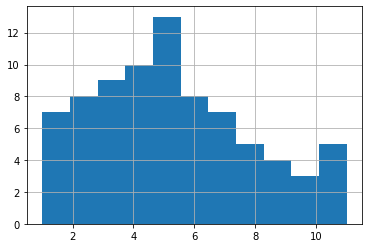

In [119]:
alumni_join.loc[alumni_join['engagement_points']>0,'engagement_points'].hist(bins=11)

### Engaged

In [120]:
engaged_list = alumni_join.loc[alumni_join["engagement_points"]>=7,('index','EMAIL_1')]

In [121]:
engaged_list.shape

(24, 2)

##### Flag creation

In [122]:
engaged_list_flag = [True if any(y in x for y in engaged_list['index']) else False for x in alumni_join['index'].fillna('x')]

In [123]:
alumni_join['engaged_list_flag'] = engaged_list_flag

In [124]:
alumni_join['engaged_list_flag'].value_counts()

False    1858
True       24
Name: engaged_list_flag, dtype: int64

In [125]:
alumni_join.shape

(1882, 38)

engaged_list.to_excel('/Users/gcdyw9/Documents/email_lists/HIGHLY_ENGAGED_LIST_08_29_2022.xlsx')

_____